<h1>K-Means Clustering</h1>

<h2>Clustering</h2>

<p>Clustering a data set $X$ into $n$ clusters $C$ involves defining a function $$f : X \rightarrow Y $$ which assigns a cluster $y_i \in Y$ to each data point $x_j \in X$. </p>

<p>It is a form of unsupervised learning. Although it can be used for classification by setting the class of each $x$ to $f(x)$, the labels $y$ are learned by the clustering algorithm, not provided. Learning $f(x)$ from both samples $X$ <b>and</b> labels $Y$ would constitute a supervised approach.</p>

<h2>K-Means</h2>

<p>The $k$ in K-means refers to the number of clusters. The algorithm learns to assign points $x$ to $k$ clusters. The "means" refers to how the clusters are decided. Each cluster has a center: the mean of all the points in the cluster. Point $x$ belongs to the cluster $y$ whose center (mean) is closest.</p> 

<p>The means are computed through an iterative process:
<ol>
    <li>Select the initial $k$ means.</li>
    <li>Assign a cluster $y$ to each $x$ in the training data according to the mean that is closest.</li>
    <li>Update the $k$ means to be the means of the new clusters.</li>
    <li>Repeat steps 2 and 3 until the means stop changing.</li>
</ol>
Further readings can be found on the <a href="http://cs.westminstercollege.edu">the class website.</a></p>

[array([8.64874089, 5.80910341]), array([[-5.99516844, -3.5638977 ]]), 0, 0, 0] means
[array([8.64874089, 5.80910341]), array([[-5.99516844, -3.5638977 ]]), array([[6.20468284, 2.3952559 ]]), 0, 0] means
[array([8.64874089, 5.80910341]), array([[-5.99516844, -3.5638977 ]]), array([[6.20468284, 2.3952559 ]]), array([[-6.76027731, -4.88138989]]), 0] means
[array([8.64874089, 5.80910341]), array([[-5.99516844, -3.5638977 ]]), array([[6.20468284, 2.3952559 ]]), array([[-6.76027731, -4.88138989]]), array([[-7.00808145,  5.76450087]])] means
[3, 1, 3, 1, 3, 0, 4, 0, 4, 3, 2, 0, 1, 4, 1, 2, 4, 1, 1, 1, 0, 2, 2, 1, 4, 0, 0, 3, 3, 1, 1, 2, 4, 1, 1, 4, 4, 2, 4, 3, 2, 2, 1, 4, 1, 0, 0, 4, 4, 0, 1, 0, 3, 0, 2, 4, 0, 1, 0, 4, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 4, 3, 2, 4, 2, 1, 0, 2, 0, 2, 3, 3, 2, 4, 2, 0, 1, 4, 4, 1, 0, 3, 1, 4, 1, 3, 3, 4, 4, 4]
[0, 1, 0, 1, 0, 2, 3, 2, 3, 0, 4, 2, 1, 3, 0, 4, 3, 1, 1, 1, 4, 4, 4, 1, 3, 2, 2, 0, 0, 1, 1, 4, 1, 1, 0, 1, 3, 4, 3, 0, 4, 4, 1, 3, 0, 2, 2, 3, 3, 2, 1, 4, 

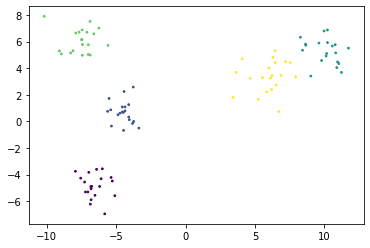

In [0]:
from sklearn.datasets.samples_generator import make_blobs
import random as rd
import numpy.random as nr
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as npla
from collections import Counter
import scipy as sci

# 1. use make_blobs to generate data
X,Y = make_blobs(100,2, centers=5)
# 2. implement k-means 
k=5

# 2.1 choose one rndom one
mean =[0,0,0,0,0]
means = nr.choice(X.shape[0],1, replace=False)
mean[0] = X[means[0]]
d = [[],[],[],[]]
for j in range(0,k-1):
  for i in range(0,len(X)): #
    d[j].append(npla.norm(mean[j]- X[i])) # m
  d[j] = d[j]/sum(d[j])

  if j > 0:
    for i in range(0,99):
      if d[j-1][i] < d[j][i]:
        d[j][i] = d[j-1][i]
        
  d[j] = d[j]/sum(d[j])
  mean[j+1]= X[nr.choice(X.shape[0],1,replace=False,p= d[j])]

  print(mean, "means")
  #mean[i] = X[means[i]]

# 2.2 cluster all the data according to its nearest mean
def clusterOfPoint(X, mean):
  bestPT = []
  for j in range(0,len(X)):
    leastDistance = 1000000
    for i in range(0,len(mean)):
      distance = np.linalg.norm(X[j]-mean[i])
      if distance < leastDistance:
        leastDistance = distance
        index = i
    bestPT.append(index)
  return bestPT
bestPT = clusterOfPoint(X,mean)
print(bestPT)

# 2.3 update the means by taking the mean of the new clusters
def redoMeans(bestPT, X):
  totalX = Counter()
  totalN = Counter(bestPT)
  for rowNum, c in enumerate(bestPT):
    totalX[c] += X[rowNum,:]
  return np.array([ totalX[c]/ totalN[c] for c in totalN])

# 2.4 repeat steps 2.2 and 2.3
for i in range(0,3):
  centroids = redoMeans(bestPT,X)
  bestPT = clusterOfPoint(X,centroids)
  print(bestPT)

# 3. plot each cluster with a different color
f = plt.figure()
ax = f.gca()
ax.scatter(X[:,0],X[:,1],3,bestPT)

In [0]:
T